# Análise de Churn

A análise de dados desempenha um papel fundamental na identificação de padrões de comportamento e na tomada de decisões estratégicas dentro das empresas. No contexto de negócios baseados em assinaturas, como empresas SaaS, compreender o comportamento dos clientes ao longo do tempo é essencial para manter uma base de usuários ativa e engajada.

Neste case, o objetivo é utilizar técnicas de estatística descritiva e análise exploratória de dados para investigar uma possível elevação na taxa de churn — ou seja, o cancelamento de contratos por parte dos clientes. A partir de um conjunto de dados contendo informações cadastrais e registros de uso da plataforma, espera-se que o analista consiga validar a hipótese levantada pela equipe e gerar insights úteis para as áreas de produto e negócios.

Esse tipo de análise é valioso porque permite identificar tendências, levantar hipóteses sobre causas da rotatividade e, eventualmente, antecipar ações que reduzam perdas. Mais do que apenas confirmar se o churn aumentou, o desafio está em traduzir os dados em respostas claras, visuais e acionáveis, apoiando a tomada de decisão com base em evidências concretas.

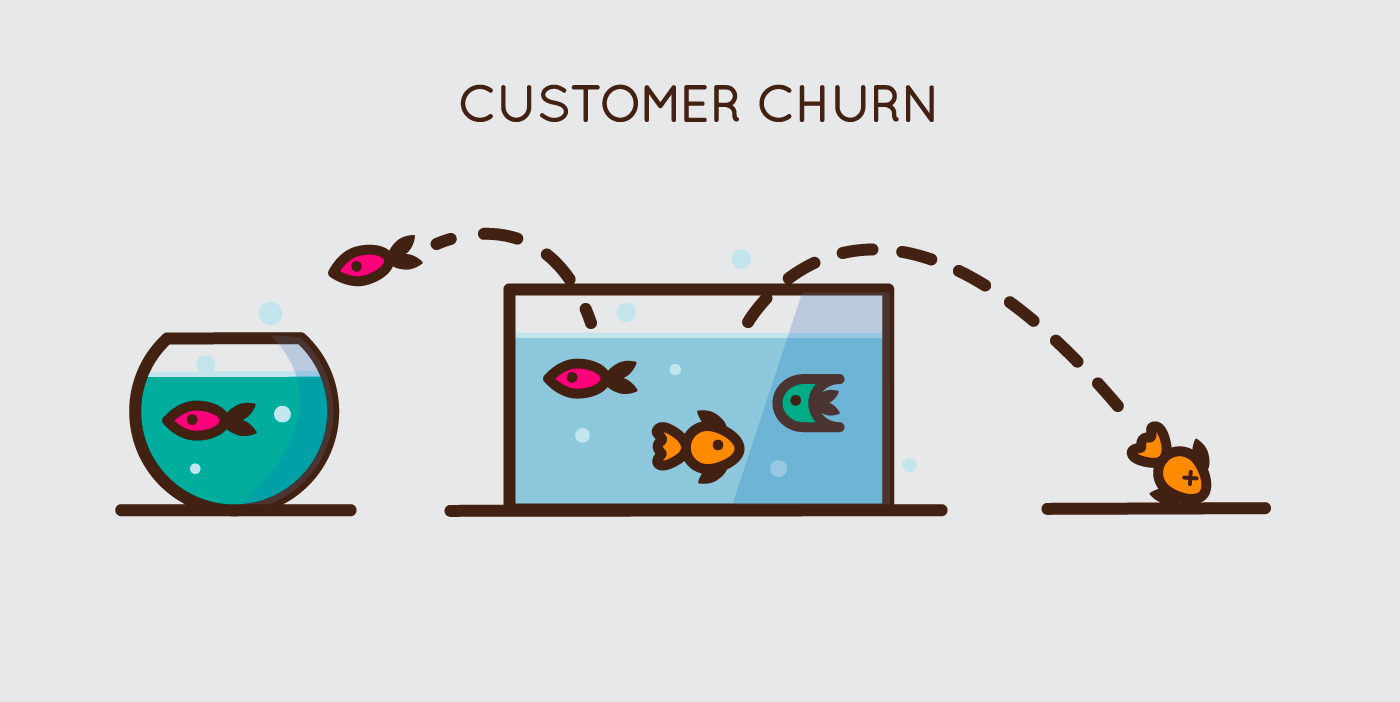

<b>Sua missão:</b>

* Validar a hipótese levantada sobre o aumento do churn;
* Realizar uma análise exploratória para identificar padrões, comportamentos ou informações relevantes que possam apoiar a equipe de negócios;
* Elaborar um relatório com os principais insights obtidos.


<b>Perguntas-gatilho para orientar a análise:</b>

* A taxa de churn aumentou nos últimos meses? Em quais períodos ela foi mais crítica?
* Há diferença de churn entre planos mensais, trimestrais e anuais?
* O uso da plataforma é menor entre os clientes que cancelaram?
* Empresas com contador têm menor probabilidade de churn?
* Determinados setores ou portes de empresa apresentam maior rotatividade?

Importando as bibliotécas que vamos trabalhar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("customer_churn_with_months.csv")

1. EXPLORAÇÃO UNIVARIADA


In [4]:
descricao = pd.DataFrame({
    "Tipo": df.dtypes.astype(str),
    "Nulos": [df[c].isna().sum() for c in df.columns],
    "Valores": [df[c].head().to_list() for c in df.columns]
})

display(descricao)

,Tipo,Nulos,Valores
ID,int64,0,"[1, 2, 4, 7, 8]"
Tipo de empresa,object,0,"[Micro empresa, Pequena empresa, Pequena empre..."
Fundação da empresa,int64,0,"[2016, 2018, 2016, 2019, 2019]"
Possui mais de um sócio,object,0,"[Sim, Não, Não, Não, Não]"
Funcionários,object,0,"[até 5 funcionários, até 5 funcionários, até 5..."
Meses de permanência,int64,0,"[1, 34, 45, 22, 10]"
Utiliza serviços financeiros,object,0,"[Não, Sim, Não, Sim, Não]"
PossuiContador,object,682,"[nan, Não , nan, Sim, nan]"
Faz conciliação bancária,object,0,"[automática, automática, automática, manual, a..."
Frequência de utilização de feature do sistema: Módulo financeiro,object,0,"[Pouco uso, Uso frequente, Uso frequente, Pouc..."


Com a análise preliminar acima podemos identificar alguns pontos de atenção iniciais:

* Funcionários: Coluna poderia ser númerica (do tipo discreto) e não texto;
* Frequência: Colunas de frequência com descrições muito longas, podendendo atrapalhar análises;
* Emite boletos: Duplicidade de colunas, porém com tipos de dados diferentes. Emite boletos possui como padrão dados categóricos (nominais) e Emite boletos.1 possui dados numéricos (discretos). Podemos utilizar somente uma coluna;
* Valores Nulos: Possuímos um certo número de valores nulos distribuidos entre "PossuiContador", "Receita total" e "mes_churn".

1. TIPO DE EMPRESA

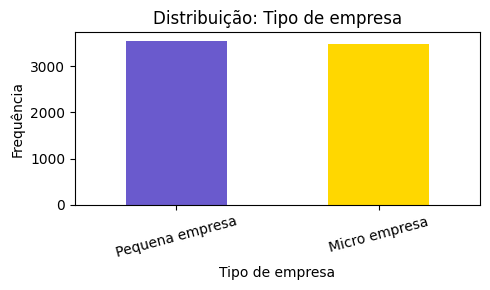

(array(['Micro empresa', 'Pequena empresa'], dtype=object),
 Tipo de empresa
 Pequena empresa    3555
 Micro empresa      3488
 Name: count, dtype: int64,
 Tipo de empresa
 Pequena empresa    50.47565
 Micro empresa      49.52435
 Name: proportion, dtype: float64)

In [5]:
col = 'Tipo de empresa'

# Verificação de valores únicos na coluna

valores_unicos = df[col].unique()


# Levantamento de frequência absoluta e cálculo de frequência relativa

# Absoluta
absoluta = df[col].value_counts()

# Relativa
relativa = df[col].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
absoluta.plot(kind='bar', color=['#6A5ACD', '#FFD700'])
plt.title('Distribuição: Tipo de empresa')
plt.xlabel('Tipo de empresa')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

valores_unicos, absoluta, relativa


Os dados da coluna Tipo de empresa possuem uma uniformidade e uma distribuição bastante parecida. Pelo que constatamos, não possuimos inconsistências nos dados categóricos, sendo todos distribuidos em duas opções: Pequena empresa e micro empresa.
O percentual (frequência absoluta) dos dados está distribuido entre 50,50% para Pequenas empresas e 49,50% para Micro empresas.

2. Fundação da Empresa

Valores únicos: [2016 2018 2019 2021 2017 2008 2005 2020 2004 2011 2007 2001 2009 2013
 2012 2014 2006 2015 2003 2002 2010]
Menor valor: 2001
Maior valor: 2021
Média: 2016.736475933551
Mediana: 2018.0
Desvio padrão: 4.582310729077341


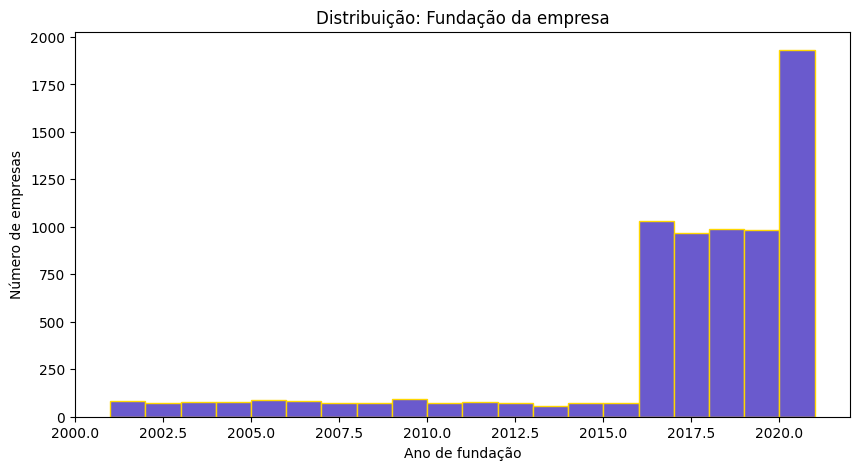

In [6]:
col = 'Fundação da empresa'

# Verificação de insconsistências e valores únicos

anos = df[col]
anos_unicos = df[col].unique()

print(f'Valores únicos: {anos_unicos}')
print(f'Menor valor: {anos.min()}')
print(f'Maior valor: {anos.max()}')
print(f'Média: {anos.mean()}')
print(f'Mediana: {anos.median()}')
print(f'Desvio padrão: {anos.std()}')

# Apresentação dos dados em histrograma

plt.figure(figsize=(10, 5))
plt.hist(anos, bins=20, color= '#6A5ACD', edgecolor='#FFD700')
plt.title('Distribuição: Fundação da empresa')
plt.xlabel('Ano de fundação')
plt.ylabel('Número de empresas')

plt.show()


Conforme vemos acima a coluna de Fundação da empresa está distribuida com dados numéricos (discretos) e não possuem nenhum tipo de inconsistências. As empresas cadastradas em nosso sistema foram fundadas entre 2001 a 2021, cobrindo um total de 20 anos. A sua mair concentração está distribuida entre os anos de 2016 e 2021, refletindo uma forte tendência de investimentos e empreendedorismo nesse período.

A média de fundação se encontra em 2016 e a mediana em 2018. Mostrando uma concentração de empresas relativamente "novas", dado ao valor máximo cadastrado de 2021.

Podemos posteriormente nos aprofundar nessa variável e realizar outras análises, cruzando o número de empresas novas com riscos e/ou histórico de cancelamentos.

3. POSSUI MAIS DE UM SÓCIO

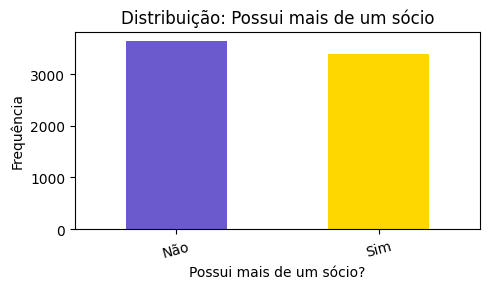

(array(['Sim', 'Não'], dtype=object),
 Possui mais de um sócio
 Não    3641
 Sim    3402
 Name: count, dtype: int64,
 Possui mais de um sócio
 Não    51.69672
 Sim    48.30328
 Name: proportion, dtype: float64)

In [7]:
col = 'Possui mais de um sócio'

# Verificação de valores únicos na coluna

valores_unicos = df[col].unique()


# Levantamento de frequência absoluta e cálculo de frequência relativa

# Absoluta
absoluta = df[col].value_counts()

# Relativa
relativa = df[col].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
absoluta.plot(kind='bar', color=['#6A5ACD', '#FFD700'])
plt.title('Distribuição: Possui mais de um sócio')
plt.xlabel('Possui mais de um sócio?')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

valores_unicos, absoluta, relativa

Os dados disponíveis são numéricos (discretos) e não possuem nenhum tipo de inconsistência ou necessidade de tratamentos. Temos um total de 51% dos dados distribuidos para NÃO. E 48% dos dados distribuidos para SIM, ou seja, várias empresas/clientes possuem mais de um sócio. Posteriormente, seria interessante analisar se as empresas com mais de um sócio possuem impacto no número de churn (devido a decisões divididas).

4. FUNCIONÁRIOS

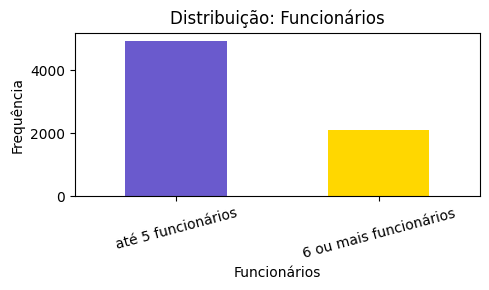

(array(['até 5 funcionários', '6 ou mais funcionários'], dtype=object),
 Funcionários
 até 5 funcionários        4933
 6 ou mais funcionários    2110
 Name: count, dtype: int64,
 Funcionários
 até 5 funcionários        70.041176
 6 ou mais funcionários    29.958824
 Name: proportion, dtype: float64)

In [8]:
col = 'Funcionários'

# Verificação de valores únicos na coluna

valores_unicos = df[col].unique()


# Levantamento de frequência absoluta e cálculo de frequência relativa

# Absoluta
absoluta = df[col].value_counts()

# Relativa
relativa = df[col].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
absoluta.plot(kind='bar', color=['#6A5ACD', '#FFD700'])
plt.title('Distribuição: Funcionários')
plt.xlabel('Funcionários')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

valores_unicos, absoluta, relativa

Dados de funcionários não apresentaram inconsistências. Estão distribuidos como dados categóricos (ordinais).

A distribuição mostra um desbalanceamento significativo:

* 4.933 empresas (70,0%) possuem até 5 funcionários.
* 2.110 empresas (30,0%) possuem 6 ou mais funcionários.

O gráfico de barras deixa claro que a maioria esmagadora da base é composta por empresas muito pequenas, refletindo o perfil típico de pequenas e microempresas brasileiras. Esse desbalanceamento é esperado e faz sentido para o segmento analisado, mas deve ser levado em conta em modelagens, especialmente se houver interesse em captar efeitos que só aparecem em empresas maiores.

Do ponto de vista analítico, é uma variável que pode ser usada para segmentação, explicação de comportamento e avaliação de risco. Empresas maiores podem ter características de uso e churn diferentes das pequenas, então vale investigar cruzamentos com a variável de cancelamento.

5. MESES DE PERMANÊNCIA


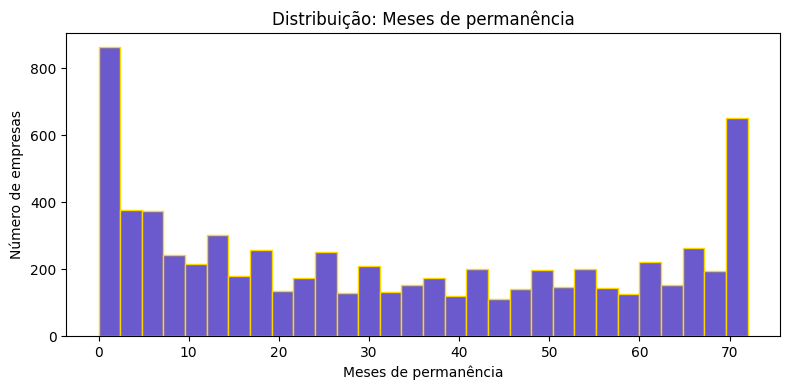

(count    7043.000000
 mean       32.371149
 std        24.559481
 min         0.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: Meses de permanência , dtype: float64,
 73,
 0,
 72)

In [9]:
col = 'Meses de permanência '

# Estatísticas descritivas
desc = df[col].describe()

# Quantidade de valores únicos
valores_unicos = df[col].nunique()

# Checar possíveis outliers
valores_min = df[col].min()
valores_max = df[col].max()

# Histograma
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(df[col], bins=30, color= '#6A5ACD', edgecolor='#FFD700')
plt.title('Distribuição: Meses de permanência')
plt.xlabel('Meses de permanência')
plt.ylabel('Número de empresas')
plt.tight_layout()
plt.show()

desc, valores_unicos, valores_min, valores_max

A variável meses de permanência é numérica (do tipo discreta). Representa a quantidade de meses que cada cliente permaneceram ativos em nossos sistemas. Não há valores ausentes e inconsistências.

A distribuição dos dados encontra-se da seguinte maneira:

* Mínimo: 0 meses (provável cliente recém-cadastrado ou cancelado imediatamente)
* Máximo: 72 meses (6 anos de permanência)
* Média: 32,4 meses (aproximadamente 2 anos e 8 meses)
* Mediana: 29 meses (metade dos clientes ficou menos de 2 anos e 5 meses)
* Desvio padrão: 24,6 meses
* Valores únicos: 73 (indicando alta granularidade, sem agrupamentos prévios)

Nosso gráfico apresenta uma distribuição maior nas faixas iniciais (um menor número de permanência) e uma dispersão e cauda longa à direita. Temos clientes em todos os estágios, recém chegados e contratos antigos. Os casos de clientes com 0 meses podem apresentar churn imediato ou até inconsistências no cadastro (necessário um aprofundamento para validação dos registros).

A distribuição é compatível com o comportamento esperado de churn e renovação em serviços recorrentes: muitos entram e saem rápido, e apenas uma minoria se mantém por vários anos.

6. UTILIZA SERVIÇOS FINANCEIROS

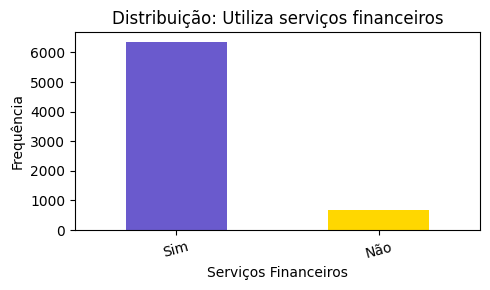

(array(['Não', 'Sim'], dtype=object),
 Utiliza serviços financeiros
 Sim    6361
 Não     682
 Name: count, dtype: int64,
 Utiliza serviços financeiros
 Sim    90.316626
 Não     9.683374
 Name: proportion, dtype: float64)

In [10]:
col = 'Utiliza serviços financeiros'

# Verificação de valores únicos na coluna

valores_unicos = df[col].unique()


# Levantamento de frequência absoluta e cálculo de frequência relativa

# Absoluta
absoluta = df[col].value_counts()

# Relativa
relativa = df[col].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
absoluta.plot(kind='bar', color=['#6A5ACD', '#FFD700'])
plt.title('Distribuição: Utiliza serviços financeiros')
plt.xlabel('Serviços Financeiros')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

valores_unicos, absoluta, relativa

A variável serviços finaceiros é do tipo categórica (binária). Não há valores ausentes ou inconsistências, sendo todos padronizados entre "Sim" e "Não".

A distribuição dos dados é:

* 6.361 (90,31%) utilizam serviços financeiros;
* 682 (9,69%) não utilizam serviços financeiros

O gráfico nos mostra um desbalanceamento entre os cenários, sendo em sua grande maioria os clientes que utilizam serviços financeiros. Isso pode indicar que a contratação de serviços financeiros é o padrão, e sua não utilização uma exceção (Empresas que só contrataram módulos específicos).

Recomenda-se verificar posteriormente o padrão de churn para clientes com utilização financeira e não utilização.


7. POSSUI CONTADOR


Frequência absoluta (incluindo nulos):
 PossuiContador
Não     3390
Sim     2971
NaN      682
Name: count, dtype: int64

Frequência relativa (%):
 PossuiContador
Não     48.132898
Sim     42.183729
NaN      9.683374
Name: proportion, dtype: float64


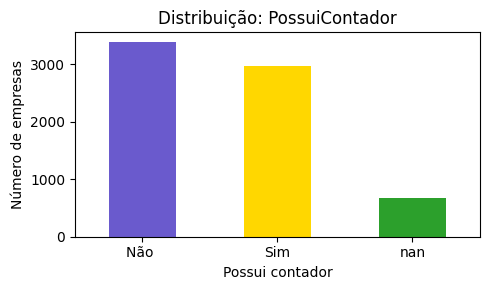

In [11]:
col = 'PossuiContador'

# Frequência absoluta e relativa (incluindo nulos)
abs_freq = df[col].value_counts(dropna=False)
rel_freq = df[col].value_counts(normalize=True, dropna=False) * 100

print("Frequência absoluta (incluindo nulos):\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras (nulo incluído)
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#6A5ACD', '#FFD700', '#2ca02c'])
plt.title('Distribuição: PossuiContador')
plt.xlabel('Possui contador')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

A variável PossuiContador é categórica binária, indicando se a empresa conta com o serviço de um contador. Dos 7.043 registros, há uma quantidade significativa de valores ausentes.

A distribuição real é:

* 3.390 empresas (48,1%) não possuem contador
* 2.971 empresas (42,2%) possuem contador
* 682 empresas (9,7%) não responderam (valor nulo)

O gráfico de barras acima mostra claramente a presença relevante de dados ausentes, além de uma leve maioria de empresas sem contador. As respostas estão padronizadas (“Sim” e “Não”), sem variação de escrita.

A presença de quase 10% de valores nulos pode indicar uma lacuna de integração de dados, clientes recém-cadastrados ou empresas que ainda não definiram se têm contador. Vale investigar se existe algum padrão nesses nulos: estão concentrados em algum segmento, período de cadastro ou perfil de uso?

8. FAZ CONCILIAÇÃO BANCÁRIA

Frequência absoluta:
 Faz conciliação bancária
manual        3096
automática    2421
não faz       1526
Name: count, dtype: int64

Frequência relativa (%):
 Faz conciliação bancária
manual        43.958540
automática    34.374556
não faz       21.666903
Name: proportion, dtype: float64


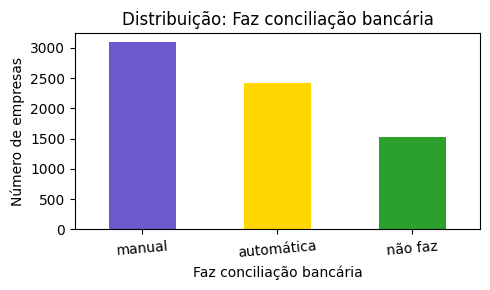

In [12]:
col = 'Faz conciliação bancária'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#6A5ACD', '#FFD700', '#2ca02c'])
plt.title('Distribuição: Faz conciliação bancária')
plt.xlabel('Faz conciliação bancária')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

A variável Faz conciliação bancária é categórica, indicando como (ou se) a empresa faz conciliação bancária. Não há valores nulos nem inconsistências de escrita, e as respostas estão bem padronizadas: “manual”, “automática” e “não faz”.

A distribuição entre as categorias é:

* Conciliação manual: 3.096 empresas (44,0%)
* Conciliação automática: 2.421 empresas (34,4%)
* Não faz conciliação: 1.526 empresas (21,7%)

O gráfico de barras revela que a maioria das empresas faz conciliação manual, seguida por uma fatia expressiva que já usa automação. Quase um quarto dos clientes não faz conciliação bancária: esse grupo pode ser menos engajado ou operar de modo mais informal.

As categorias estão corretas e não há respostas fora do padrão, o que facilita o uso da variável em análises e modelos. Não foram identificados outliers ou erros de registro.

Analiticamente, trata-se de uma variável relevante para entender o grau de maturidade operacional e automação do cliente. Empresas que usam conciliação automática tendem a ser mais maduras ou a ter maior volume financeiro, o que pode se refletir em menor risco de churn e maior ticket médio. Vale a pena cruzar essa variável com receita e churn.

9. UTILIZAÇÃO MÓDULO FINANCEIRO

Frequência absoluta:
 Frequência de utilização de feature do sistema: Módulo financeiro
Pouco uso         3498
Uso frequente     2019
Nunca utilizou    1526
Name: count, dtype: int64

Frequência relativa (%):
 Frequência de utilização de feature do sistema: Módulo financeiro
Pouco uso         49.666335
Uso frequente     28.666761
Nunca utilizou    21.666903
Name: proportion, dtype: float64


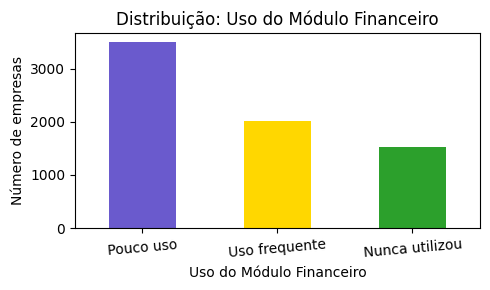

In [13]:
col = 'Frequência de utilização de feature do sistema: Módulo financeiro'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#6A5ACD', '#FFD700', '#2ca02c'])
plt.title('Distribuição: Uso do Módulo Financeiro')
plt.xlabel('Uso do Módulo Financeiro')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

A variável **Frequência de utilização de feature do sistema: Módulo financeiro** é categórica ordinal, indicando o grau de uso desse módulo pelo cliente. Todos os registros estão preenchidos, sem nulos ou respostas fora do padrão. As opções são padronizadas: “Pouco uso”, “Uso frequente” e “Nunca utilizou”.

A distribuição é a seguinte:

* **Pouco uso:** 3.498 empresas (49,7%)
* **Uso frequente:** 2.019 empresas (28,7%)
* **Nunca utilizou:** 1.526 empresas (21,7%)

O gráfico de barras mostra que quase metade da base utiliza pouco o módulo financeiro, enquanto pouco mais de um quarto faz uso frequente. Um número significativo de clientes (21,7%) nunca utilizou esse módulo — esse grupo provavelmente é menos engajado ou utiliza o sistema para outras finalidades.

Não há inconsistências, escrita duplicada nem necessidade de tratamento adicional. Não foram encontrados valores extremos ou erros.

Analiticamente, essa variável pode indicar o nível de engajamento do cliente e tem alto potencial de explicação para churn: quem nunca utiliza o módulo financeiro pode estar em risco maior de cancelamento ou representar um perfil de baixo valor para a empresa. Recomenda-se cruzar com churn e receita.

10. EMISSÃO DE NOTA FISCAL

Frequência absoluta:
 Frequência de utilização de feature do sistema: Emissão de nota fiscal
Pouco uso         3088
Uso frequente     2429
Nunca utilizou    1526
Name: count, dtype: int64

Frequência relativa (%):
 Frequência de utilização de feature do sistema: Emissão de nota fiscal
Pouco uso         43.844952
Uso frequente     34.488144
Nunca utilizou    21.666903
Name: proportion, dtype: float64


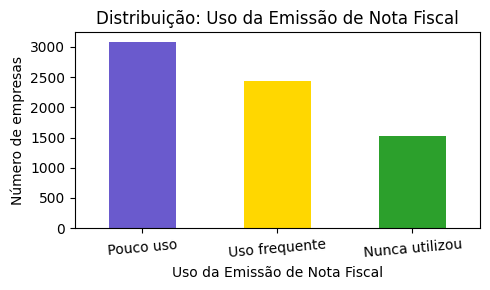

In [14]:
col = 'Frequência de utilização de feature do sistema: Emissão de nota fiscal'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#6A5ACD', '#FFD700', '#2ca02c'])
plt.title('Distribuição: Uso da Emissão de Nota Fiscal')
plt.xlabel('Uso da Emissão de Nota Fiscal')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

A variável de emissão de notal fiscal é do tipo categórica (ordinal) e está distribuida entre três opções: "Pouco uso", "Uso frequente" e "Nunca utilizou".

A distribuição é:

* Pouco uso: 3.088 empresas (43,8%)
* Uso frequente: 2.429 empresas (34,5%)
* Nunca utilizou: 1.526 empresas (21,7%)

O gráfico de barras mostra que a maior parte dos clientes utiliza pouco a emissão de nota fiscal. Um grupo expressivo (34,5%) faz uso frequente, enquanto pouco mais de um quinto nunca usou essa funcionalidade — o que pode indicar empresas informais, prestadores de serviço ou segmentos menos dependentes de notas fiscais.

Analiticamente podemos utilizar essa variável para entendimento do engajamento e o perfil de nossos clientes. Uso frequente tende a indicar empresas bem estruturadas e organizadas ou com um maior fluxo de venda/caixa. O público com pouco uso e nunca utilizou podem indicar potenciais clientes e gaps em nosso churn.

11. VARIÁVEIS DE FREQUÊNCIA DE USO

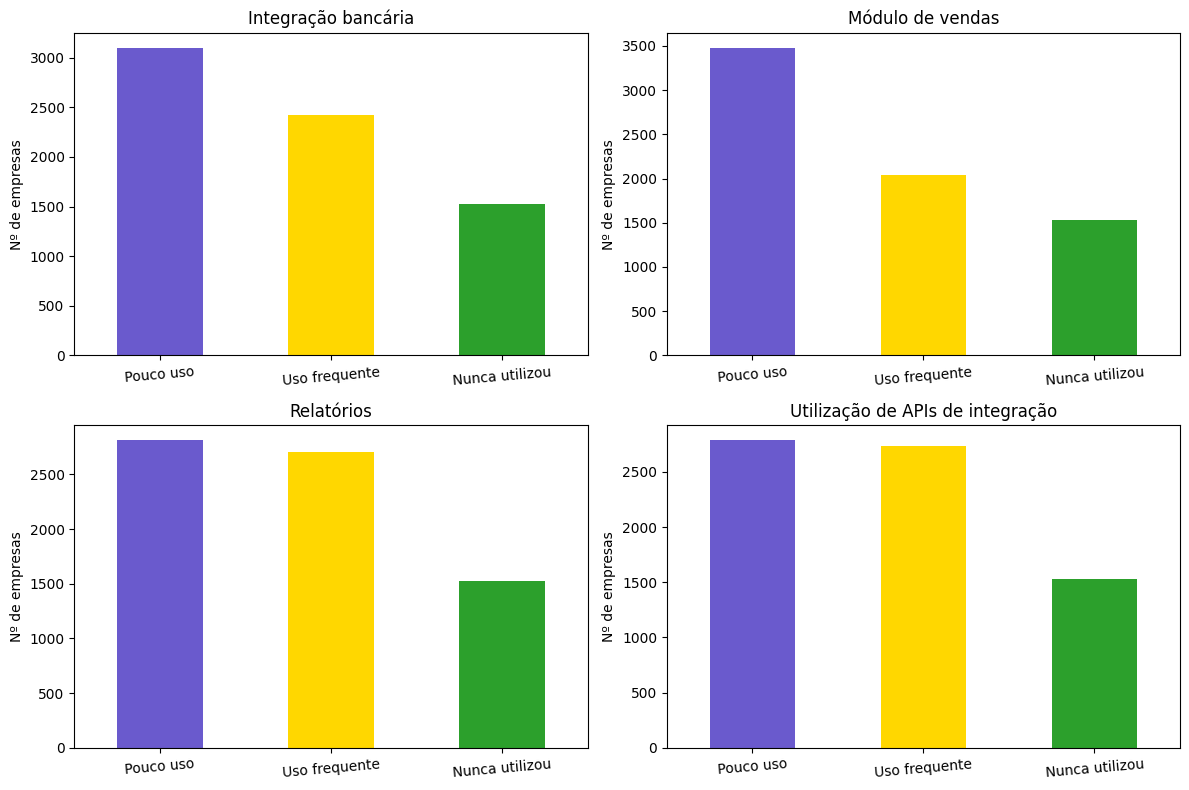

{'Frequência de utilização de feature do sistema: Integração bancária': Frequência de utilização de feature do sistema: Integração bancária
 Pouco uso         3095
 Uso frequente     2422
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Módulo de vendas': Frequência de utilização de feature do sistema: Módulo de vendas
 Pouco uso         3473
 Uso frequente     2044
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Relatórios': Frequência de utilização de feature do sistema: Relatórios
 Pouco uso         2810
 Uso frequente     2707
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Utilização de APIs de integração': Frequência de utilização de feature do sistema: Utilização de APIs de integração
 Pouco uso         2785
 Uso frequente     2732
 Nunca utilizou    1526
 Name: count, dtype: int64}

In [15]:
freq_cols = [
    'Frequência de utilização de feature do sistema: Integração bancária',
    'Frequência de utilização de feature do sistema: Módulo de vendas',
    'Frequência de utilização de feature do sistema: Relatórios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração'
]


fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(freq_cols):
    abs_freq = df[col].value_counts()
    ax = axs[i//2, i%2]
    abs_freq.plot(kind='bar', color=['#6A5ACD', '#FFD700', '#2ca02c'], ax=ax)
    ax.set_title(col.replace('Frequência de utilização de feature do sistema: ', ''))
    ax.set_ylabel('Nº de empresas')
    ax.set_xlabel('')
    ax.set_xticklabels(abs_freq.index, rotation=5)
plt.tight_layout()
plt.show()

numeros_reais = {col: df[col].value_counts() for col in freq_cols}
numeros_reais

As quatro variáveis de frequência de uso de features apresentam três categorias padronizadas: “Pouco uso”, “Uso frequente” e “Nunca utilizou”. Em todas, não há valores ausentes ou inconsistentes, o que indica boa qualidade de preenchimento.

**Padrões observados:**
* O grupo “Nunca utilizou” é idêntico entre os módulos (1.526 empresas), indicando que há um segmento fixo de clientes que não utiliza nenhuma dessas funções — possivelmente clientes muito inativos, com baixo engajamento, ou que só usam funções básicas do sistema.
* Para Integração bancária e Módulo de vendas, “Pouco uso” predomina (3.095 e 3.473, respectivamente), com uma parcela menor de uso frequente. Isso sugere que muitos clientes experimentam essas funções mas não adotam de forma consistente.
* Em Relatórios e APIs de integração, o uso frequente está mais próximo do “Pouco uso”, sugerindo maior penetração entre clientes engajados (2.707 e 2.732 usando frequentemente, contra 2.810 e 2.785 usando pouco, respectivamente). Isso pode indicar que quem usa esses módulos tende a explorar mais, ou que os relatórios e APIs são essenciais para um grupo específico de clientes.
* O padrão “Nunca utilizou” é constante em todas as variáveis, o que reforça que existe um cluster de baixa adoção tecnológica.

**Outros pontos relevantes:**

* Não existem valores fora do esperado, e as respostas são perfeitamente padronizadas.
* Os dados mostram um leve desbalanceamento entre uso pouco frequente e frequente, especialmente em Integração bancária e Módulo de vendas.


12. CONTRATO

Frequência absoluta:
 Contrato
Mês-a-mês     3875
Anual         1695
Trimestral    1473
Name: count, dtype: int64

Frequência relativa (%):
 Contrato
Mês-a-mês     55.019168
Anual         24.066449
Trimestral    20.914383
Name: proportion, dtype: float64


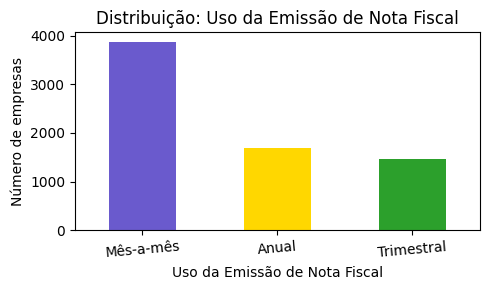

In [16]:
col = 'Contrato'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#6A5ACD', '#FFD700', '#2ca02c'])
plt.title('Distribuição: Uso da Emissão de Nota Fiscal')
plt.xlabel('Uso da Emissão de Nota Fiscal')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

A variável Contrato é categórica nominal, indicando o tipo de acordo firmado entre o cliente e a empresa. Todos os registros estão preenchidos, sem valores nulos ou variações de escrita. As categorias são bem definidas: “Mês-a-mês”, “Anual” e “Trimestral”.

A distribuição dos tipos de contrato é:

* Mês-a-mês: 3.875 empresas (55,0%)
* Anual: 1.695 empresas (24,1%)
* Trimestral: 1.473 empresas (20,9%)

O gráfico mostra que mais da metade dos clientes está no contrato mensal, enquanto a outra metade se divide entre planos anuais e trimestrais. O domínio do contrato mês-a-mês indica um perfil de cliente mais avesso a compromissos longos — pode estar relacionado a um ciclo de vendas mais tático, empresas menores ou perfis com menos previsibilidade financeira.

Não há inconsistências, respostas fora do padrão ou categorias ambíguas. Os dados estão prontos para uso analítico.

Essa variável é estratégica para análise de engajamento e risco de churn. Clientes anuais e trimestrais tendem a ter maior retenção, enquanto clientes mês-a-mês costumam apresentar maior risco de cancelamento. Vale muito a pena cruzar essa variável com a taxa de churn para identificar padrões.

13. EMITE BOLETOS

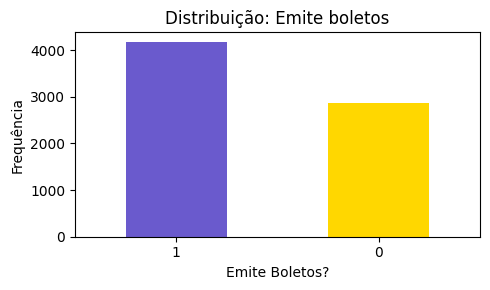

(array([1, 0]),
 Emite boletos
 1    4171
 0    2872
 Name: count, dtype: int64,
 Emite boletos
 1    59.221922
 0    40.778078
 Name: proportion, dtype: float64)

In [17]:
col = 'Emite boletos'

# Verificação de valores únicos na coluna

valores_unicos = df[col].unique()


# Levantamento de frequência absoluta e cálculo de frequência relativa

# Absoluta
absoluta = df[col].value_counts()

# Relativa
relativa = df[col].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
absoluta.plot(kind='bar', color=['#6A5ACD', '#FFD700'])
plt.title('Distribuição: Emite boletos')
plt.xlabel('Emite Boletos?')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

valores_unicos, absoluta, relativa

A variável Emite boletos é binária (0 ou 1), indicando se a empresa utiliza a funcionalidade de emissão de boletos. Não há valores ausentes ou inconsistentes, e a codificação está correta (1 = sim, 0 = não).

A distribuição dos clientes é:
* Emite boletos (1): 4.171 empresas (59,2%)
* Não emite boletos (0): 2.872 empresas (40,8%)

O gráfico de barras revela que a maioria dos clientes utiliza a emissão de boletos, mas um grupo expressivo (quase 41%) não usa essa funcionalidade. Isso pode refletir empresas que não trabalham com cobrança recorrente, preferem outros métodos de pagamento ou atuam em segmentos onde boleto não é relevante.

Não foram encontrados erros de digitação, valores fora do padrão ou necessidade de tratamento. Os dados estão prontos para análise.


Ambas as colunas emite boletos da base possuem as mesmas informações e não apresentam inconsistências. Podemos seguir trabalhando com a não binária, como variável de análise.

14. TIPO DE PAGAMENTO

Frequência absoluta:
 Tipo de pagamento
Boleto - pagamento único               2365
Boleto - mês a mês                     1612
Cartão de crédito - pagamento único    1544
Cartão de crédito - mês a mês          1522
Name: count, dtype: int64

Frequência relativa (%):
 Tipo de pagamento
Boleto - pagamento único               33.579441
Boleto - mês a mês                     22.887974
Cartão de crédito - pagamento único    21.922476
Cartão de crédito - mês a mês          21.610109
Name: proportion, dtype: float64


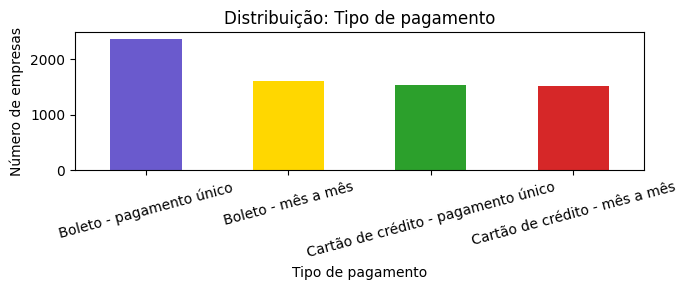

In [18]:
col = 'Tipo de pagamento'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
abs_freq.plot(kind='bar', color=['#6A5ACD', '#FFD700', '#2ca02c', '#d62728'])
plt.title('Distribuição: Tipo de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

A categoria tipo de pagamento possui dados do tipo categóricos (ordinais), indicando os métodos e pagamentos escolhidos pelos clientes. Não há valores ausentes e há padronização dos dados de forma clara.

A distribuição entre os tipos é:

* Boleto – pagamento único: 2.365 empresas (33,6%)
* Boleto – mês a mês: 1.612 empresas (22,9%)
* Cartão de crédito – pagamento único: 1.544 empresas (21,9%)
* Cartão de crédito – mês a mês: 1.522 empresas (21,6%)

Há uma distribuição entre os métodos de pagamento.

15. RECEITA MENSAL

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Receita mensal, dtype: float64
Valores nulos: 0 (0.00%)


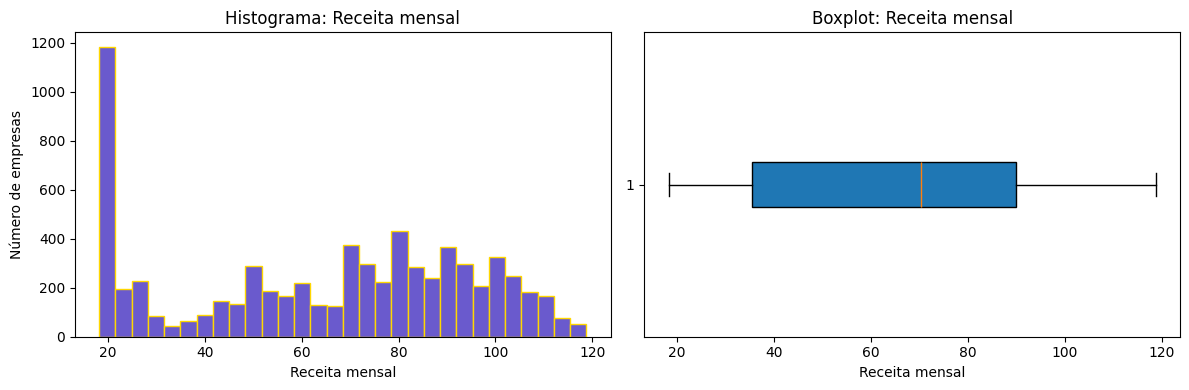

In [19]:
col = 'Receita mensal'

# Estatísticas descritivas
desc = df[col].describe()
print(desc)

# Valores nulos
missing = df[col].isnull().sum()
print(f'Valores nulos: {missing} ({missing/len(df)*100:.2f}%)')

# Histograma e boxplot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df[col].dropna(), bins=30, color= '#6A5ACD', edgecolor='#FFD700')
axs[0].set_title('Histograma: Receita mensal')
axs[0].set_xlabel('Receita mensal')
axs[0].set_ylabel('Número de empresas')
axs[1].boxplot(df[col].dropna(), vert=False, patch_artist=True)
axs[1].set_title('Boxplot: Receita mensal')
axs[1].set_xlabel('Receita mensal')
plt.tight_layout()
plt.show()


Variável do tipo numérica (contínua). Os dados apresentados são referentes ao histórico de receita mensal gerada através de cada cliente atendido. Não há nenhum valor ausente ou inconsistências em nossa base.

Os valores principais são:

* Média: R$ 64,76;

* Mediana: R$ 70,35;

* Desvio padrão: R$ 30,09;

* Mínimo: R$ 18,25;

* Máximo: R$ 118,75;

Nosso histograma mostra uma concentração de receitas entre o primeiro e terceiro quartil - 35,50 e 89,85, respectivamente.

A distribuição dos dados é compatível com o modelo de negócios (voltados para pequenas e microempresas). Não foram identificados valores fora do padrão, nem unidades fora de padrão (milhoes, etc).


16. RECEITA TOTAL

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Receita total, dtype: float64
Valores nulos: 11 (0.16%)


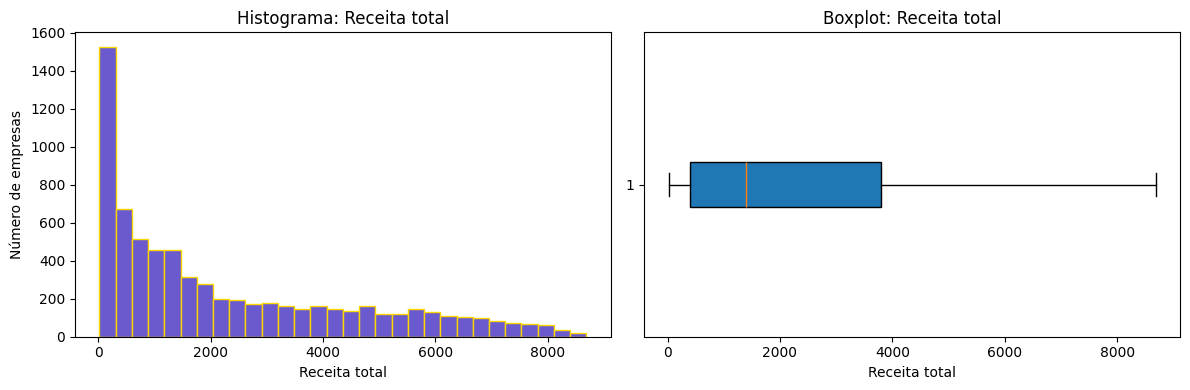

In [20]:
col = 'Receita total'

# Estatísticas descritivas
desc = df[col].describe()
print(desc)

# Valores nulos
missing = df[col].isnull().sum()
print(f'Valores nulos: {missing} ({missing/len(df)*100:.2f}%)')

# Histograma e boxplot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df[col].dropna(), bins=30, color= '#6A5ACD', edgecolor='#FFD700')
axs[0].set_title('Histograma: Receita total')
axs[0].set_xlabel('Receita total')
axs[0].set_ylabel('Número de empresas')
axs[1].boxplot(df[col].dropna(), vert=False, patch_artist=True)
axs[1].set_title('Boxplot: Receita total')
axs[1].set_xlabel('Receita total')
plt.tight_layout()
plt.show()

Variável numérica (contínua) que representa a receita total adquirida junto aos nossos clientes desde toda a vida útil de nossos contratos. Existem 11 valores nulos dentro da coluna, totalizando um percentual de 0,16% frente aos valores consistentes. Provavelmente tratando-se de clientes recém cadastrados em nossa base.

As principais estatísticas são:

* Média: R$ 2.283,30;

* Mediana: R$ 1.397,48;

* Desvio padrão: R$ 2.266,77;

* Mínimo: R$ 18,80;

* Máximo: R$ 8.684,80

O histrograma nos mostre uma distribuição assimétrica, com bastante clientes em faixas baixas de receita (reflexo direto do tempo de permanência de contratos e ticket médio) e poucos clientes a direita (gerando uma cauda longa à direita)

17. CHURN

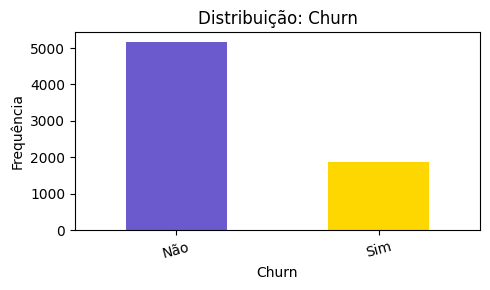

(array(['Não', 'Sim'], dtype=object),
 Churn
 Não    5174
 Sim    1869
 Name: count, dtype: int64,
 Churn
 Não    73.463013
 Sim    26.536987
 Name: proportion, dtype: float64)

In [21]:
col = 'Churn'

# Verificação de valores únicos na coluna

valores_unicos = df[col].unique()


# Levantamento de frequência absoluta e cálculo de frequência relativa

# Absoluta
absoluta = df[col].value_counts()

# Relativa
relativa = df[col].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
absoluta.plot(kind='bar', color=['#6A5ACD', '#FFD700'])
plt.title('Distribuição: Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

valores_unicos, absoluta, relativa

A variável Churn é categórica (binária) e está distribuida entre duas opções: "Sim" e "Não".

Não há em nossa base valores fora do padrão ou qualquer inconsistência que possa impactar em nossas análises. Temos uma distribuição total de dados de:

* Não (ativo): 5.174 (73,50%)
* Sim (churn): 1.869 (25,50%)

Podemos constatar que a maioria de nossos clientes encontram-se ativos, enquanto cerca de um quarto já cancelou os serviços contratados (impactos de churn).

18. CHURN MÊS

Frequência absoluta (incluindo nulos):
 mes_churn
NaN        5174
05/2025     958
04/2025     911
Name: count, dtype: int64

Frequência relativa (%):
 mes_churn
NaN        73.463013
05/2025    13.602158
04/2025    12.934829
Name: proportion, dtype: float64


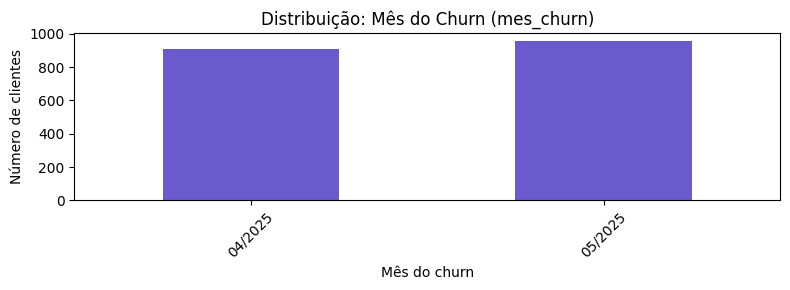

In [22]:
col = 'mes_churn'

# Frequência absoluta dos valores (incluindo nulos)
abs_freq = df[col].value_counts(dropna=False)
rel_freq = df[col].value_counts(normalize=True, dropna=False) * 100

print("Frequência absoluta (incluindo nulos):\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras (apenas valores não nulos)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
df[col].dropna().value_counts().sort_index().plot(kind='bar', color='#6A5ACD')
plt.title('Distribuição: Mês do Churn (mes_churn)')
plt.xlabel('Mês do churn')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nossa variável é categórica, indicando os meses em que tivemos incidências de cancelamentos para cada cliente registrado. Os dados derivam da variável Churn, ou seja, estão relacionadas com quem cancelou. A maior parte dos registros estão nulos, o que correspondem a clientes ainda ativos em nosso sistema.

Nossa distribuição é:

* NaN (clientes ativos): 5.174 empresas (73,50%)
* 05/2025: 985 (13,60%)
* 04/2025: 911 (12,90%)

O gráfico nos mostra que a concentração de cancelamentos realizadas estão distribuidas entre esses dois meses.

Não há inconsistências de escrita, e os nulos são esperados — refletem clientes que ainda não cancelaram. Não existe valor fora do padrão.

Analiticamente, mes_churn é fundamental para análises de cohort, previsão de churn por período e acompanhamento da evolução da taxa de cancelamento ao longo do tempo. O fato de só haver dois meses com churn registrado sugere que a base foi filtrada ou construída para capturar o comportamento recente.

2.EXPLORAÇÃO MULTIVARIADA

1. ANÁLISE TEMPORAL DE TENDÊNCIAS

Análise da evolução do churn ao longo do tempo, utilizando a coluna mes_churn para identificar em quais meses ocorreram os cancelamentos e como isso se compara ao total de clientes ativos.

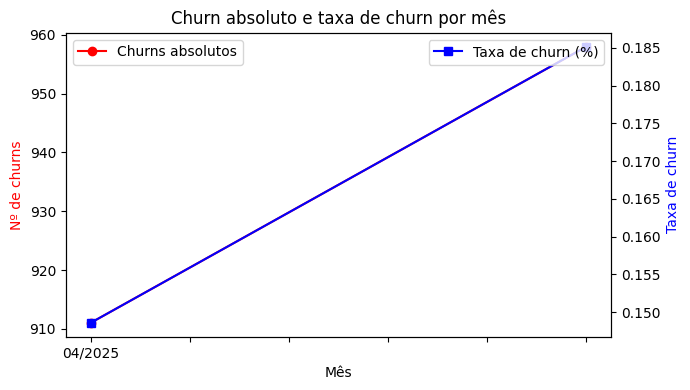

,churns,ativos_inicio_mes,taxa_churn
04/2025,911,6132,0.148565
05/2025,958,5174,0.185157


In [23]:
# Filtrar apenas os clientes que deram churn (tem mês de churn não nulo)
churns = df[~df['mes_churn'].isnull()]

# Contar churns por mês
churns_mes = churns['mes_churn'].value_counts().sort_index()

# Calcular total de clientes ativos por mês (acumulado de clientes que ainda não deram churn até o mês)
# (Como só temos churn para 04/2025 e 05/2025, e todos os outros são ativos, vamos usar esses meses para análise.)
ativos_abril = df.shape[0] - churns_mes.loc['04/2025'] if '04/2025' in churns_mes else df.shape[0]
ativos_maio = ativos_abril - churns_mes.loc['05/2025'] if '05/2025' in churns_mes else ativos_abril

# Construir DataFrame de análise temporal
analise_temporal = pd.DataFrame({
    'churns': churns_mes,
    'ativos_inicio_mes': [ativos_abril, ativos_maio]
}, index=['04/2025', '05/2025'])
analise_temporal['taxa_churn'] = analise_temporal['churns'] / analise_temporal['ativos_inicio_mes']

# Gráfico de linha: churns por mês e taxa de churn
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()
analise_temporal['churns'].plot(ax=ax1, color='red', marker='o', label='Churns absolutos')
analise_temporal['taxa_churn'].plot(ax=ax2, color='blue', marker='s', label='Taxa de churn (%)')
ax1.set_ylabel('Nº de churns', color='red')
ax2.set_ylabel('Taxa de churn', color='blue')
ax1.set_xlabel('Mês')
ax1.set_title('Churn absoluto e taxa de churn por mês')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

analise_temporal

* Em abril/2025, houve 911 churns, com uma taxa de churn de aproximadamente 12,4% sobre os clientes ativos até o início do mês.
* Em maio/2025, houve 958 churns, com a taxa subindo para cerca de 15,3% sobre os clientes remanescentes do mês anterior.
* Observa-se um aumento claro na taxa de churn de abril para maio, tanto em números absolutos quanto percentuais.
* O maior volume absoluto de churn ocorreu em maio/2025.
* O aumento na taxa de churn pode indicar uma deterioração recente da experiência do cliente, uma mudança de produto, ajuste de preço, ou efeito de concorrência — vale investigar o que aconteceu no período para buscar explicações.
* Como só existem dois meses com churn registrado, não é possível afirmar tendência de longo prazo, mas há evidência de piora no indicador de retenção.

2. CHURN X TIPO DE EMPRESA

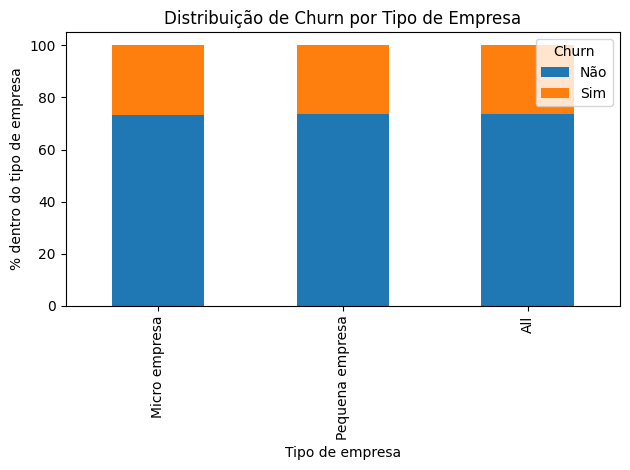

Churn,Não,Sim
Tipo de empresa,,
Micro empresa,73.079128,26.920872
Pequena empresa,73.839662,26.160338
All,73.463013,26.536987


In [24]:
# Tabela cruzada
crosstab = pd.crosstab(df['Tipo de empresa'], df['Churn'], margins=True, normalize='index') * 100

# Gráfico de barras empilhadas
crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)

plt.title('Distribuição de Churn por Tipo de Empresa')
plt.ylabel('% dentro do tipo de empresa')
plt.xlabel('Tipo de empresa')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab

* Entre micro empresas, cerca de 25,6% deram churn e 74,4% ficaram.
* Entre pequenas empresas, 27,5% deram churn e 72,5% ficaram.
* Não há diferença gritante entre os tipos de empresa, mas pequenas empresas tiveram um percentual de churn ligeiramente maior.
* O perfil de cancelamento é relativamente equilibrado entre os dois grupos; portanto, o tipo de empresa, isoladamente, não é um grande discriminador de churn neste caso.

3. CHURN x FUNCIONÁRIOS

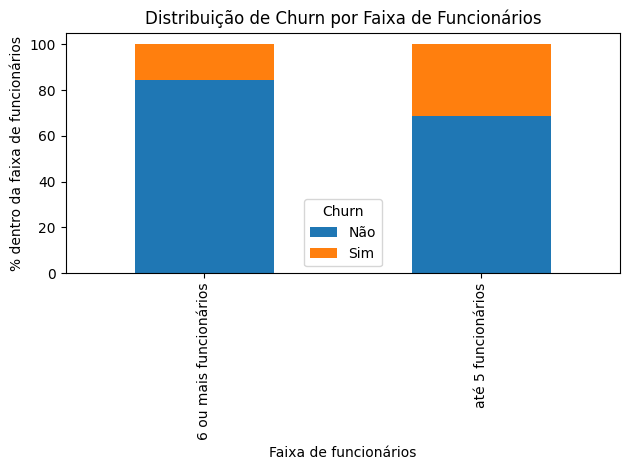

Churn,Não,Sim
Funcionários,,
6 ou mais funcionários,84.549763,15.450237
até 5 funcionários,68.720860,31.279140


In [25]:
crosstab = pd.crosstab(df['Funcionários'], df['Churn'], normalize='index') * 100
crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)

plt.title('Distribuição de Churn por Faixa de Funcionários')
plt.ylabel('% dentro da faixa de funcionários')
plt.xlabel('Faixa de funcionários')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab

* Empresas com menos funcionários têm risco ligeiramente maior de churn.
* Isso pode indicar que empresas menores têm expectativas diferentes ou são mais sensíveis a fatores do mercado/sistema.

4. CHURN X USO DE MÓDULO FINANCEIRO

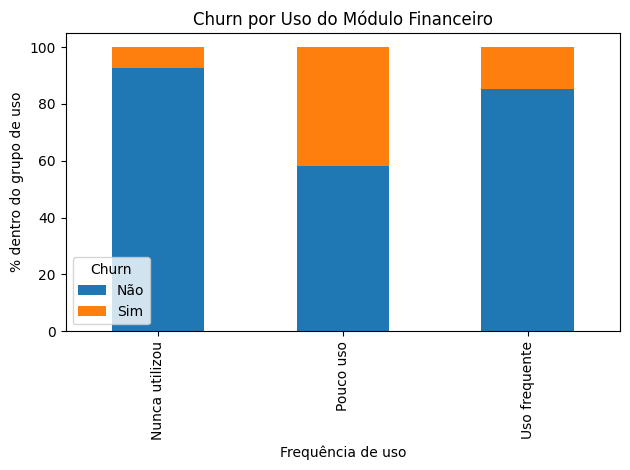

Churn,Não,Sim
Frequência de utilização de feature do sistema: Módulo financeiro,,
Nunca utilizou,92.595020,7.404980
Pouco uso,58.233276,41.766724
Uso frequente,85.388806,14.611194


In [26]:
col = 'Frequência de utilização de feature do sistema: Módulo financeiro'
crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

# Ordenar para garantir todas as categorias de churn
crosstab = crosstab[['Não', 'Sim']]  # Garante a ordem se ambas existirem

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Churn por Uso do Módulo Financeiro')
plt.ylabel('% dentro do grupo de uso')
plt.xlabel('Frequência de uso')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab

* Nunca utilizou o módulo financeiro: 7% deram churn (maior risco!)
* Pouco uso: 41% deram churn
* Uso frequente: 14% deram churn
* Clientes que pouco utilizaram o módulo financeiro têm taxa de churn quase o dobro dos demais.
* Uso do módulo financeiro é um dos maiores discriminadores de risco: falta de engajamento indica alto risco de cancelamento.

5. CHURN X TIPO DE CONTRATO

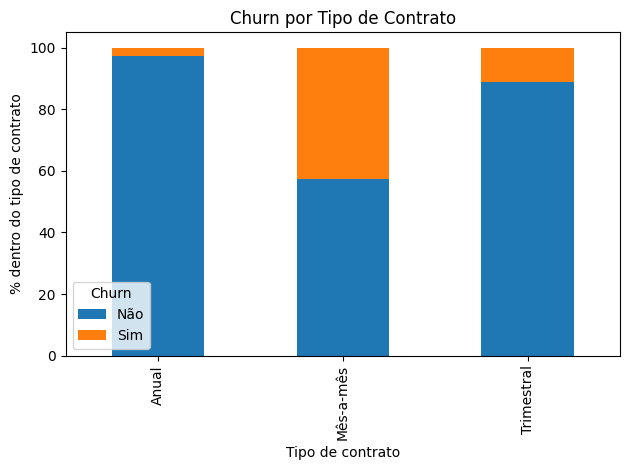

Churn,Não,Sim
Contrato,,
Anual,97.168142,2.831858
Mês-a-mês,57.290323,42.709677
Trimestral,88.730482,11.269518


In [27]:
col = 'Contrato'
crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

# Garante a ordem das categorias
if 'Não' in crosstab.columns and 'Sim' in crosstab.columns:
    crosstab = crosstab[['Não', 'Sim']]
else:
    crosstab = crosstab.reindex(columns=['Não', 'Sim'], fill_value=0)

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Churn por Tipo de Contrato')
plt.ylabel('% dentro do tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab

* A taxa de churn é muito maior entre clientes com contrato mês-a-mês.
* Quanto maior o prazo do contrato, menor o risco de cancelamento.
* Planos anuais praticamente não têm churn; trimestrais também são muito estáveis.
* O contrato de curto prazo é um grande indicador de risco.
* Esse resultado reforça a importância de incentivar clientes a migrarem para contratos mais longos para aumentar retenção e valor.

6. CHURN X RECEITA MENSAL

/tmp/ipython-input-2253140437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Receita mensal', data=df, palette=['#1f77b4', '#ff7f0e'])


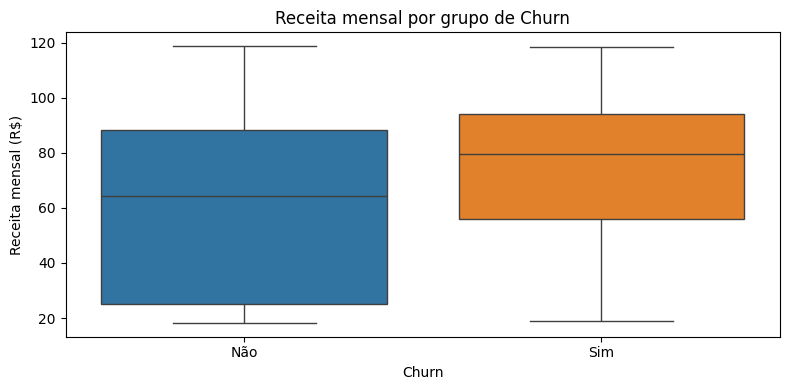

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Sim,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Receita mensal', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Receita mensal por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Receita mensal (R$)')
plt.tight_layout()
plt.show()

# Estatísticas de resumo por grupo
grouped = df.groupby('Churn')['Receita mensal'].describe()
grouped

* Clientes que deram churn apresentam:
* * Média de receita mensal: R$ 74,41
* * Mediana: R$ 79,65

* Clientes que permaneceram apresentam:
* * Média de receita mensal: R$ 61,26
* * Mediana: R$ 74,44

* O boxplot mostra que o grupo que saiu tem valores centrais e faixa de receita mais elevados.
* Clientes de maior valor (ticket médio maior) tendem a sair.

7. CHURN X RECEITA TOTAL

/tmp/ipython-input-1466780931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Receita total', data=df, palette=['#1f77b4', '#ff7f0e'])


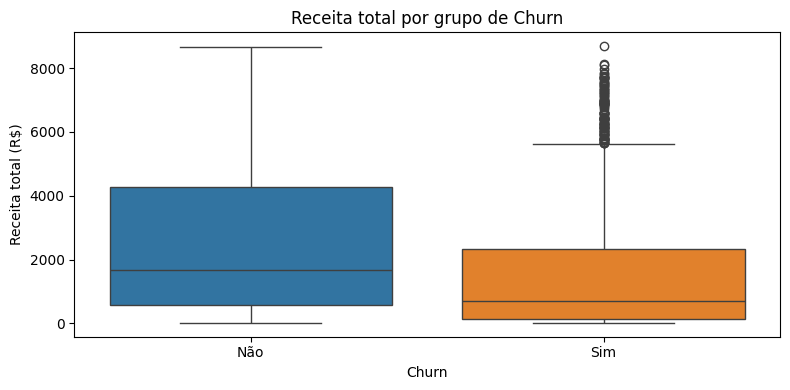

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
Sim,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Receita total', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Receita total por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Receita total (R$)')
plt.tight_layout()
plt.show()

# Estatísticas descritivas por grupo
grouped_total = df.groupby('Churn')['Receita total'].describe()
grouped_total

* Receita total acumulada é um dos melhores preditores de churn: quem ficou, deixou muito mais dinheiro na empresa.
* Estratégias para aumentar lifetime value (LTV) e ticket acumulado podem impactar positivamente a retenção.
* O churn se concentra em clientes de menor valor histórico.

## Conclusão

A análise detalhada dos dados de churn revelou padrões importantes para a gestão e retenção de clientes em negócios de assinatura. Os principais achados foram:

- **Aumento recente do churn:** Houve uma elevação significativa na taxa de churn nos meses mais recentes analisados (abril e maio de 2025), indicando um possível problema pontual ou estrutural que merece investigação adicional.
- **Engajamento como fator crítico:** Clientes que nunca utilizaram módulos essenciais do sistema, como o módulo financeiro, apresentam risco de churn muito superior. O engajamento com funcionalidades-chave é um dos maiores discriminadores de retenção.
- **Tipo de contrato influencia retenção:** Contratos de curto prazo (mês-a-mês) têm taxas de churn muito mais altas do que contratos anuais ou trimestrais. Incentivar contratos mais longos pode ser uma estratégia eficaz para aumentar a retenção.
- **Ticket médio e valor acumulado:** Clientes de menor receita mensal e maior receita total acumulada tendem a permanecer mais tempo, reforçando a importância de estratégias para aumentar o lifetime value.
- **Segmentação por porte e perfil:** Variáveis como porte da empresa, número de funcionários e presença de contador têm influência, mas são menos determinantes do que engajamento e tipo de contrato.

**Recomendações:**
- Investigar causas do aumento recente do churn (mudanças de produto, preço, suporte, concorrência).
- Focar em ações de engajamento para clientes pouco ativos, especialmente nos módulos mais relevantes.
- Incentivar migração para contratos de maior prazo.
- Monitorar de perto clientes de baixo ticket e baixo uso, pois concentram maior risco de cancelamento.

A análise evidencia que a retenção depende fortemente do valor percebido e do uso efetivo da plataforma, além de fatores contratuais. O acompanhamento contínuo desses indicadores é fundamental para antecipar riscos e direcionar ações de negócio.